In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(100)

%config InlineBackend.figure_format = 'retina'

import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = (1,1,1,1)
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

## VIRTUS

In [3]:
list_samples = [str(i) for i in range(10)]

In [4]:
list_samples

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [13]:
for i,s in enumerate(list_samples):
    d = pd.read_csv('subsample_{}/virus.counts.final.tsv'.format(s), sep='\t')
    d.columns = ['virus', s, 'rate']
    d = d[['virus', s]]
    
    if i == 0:
        df_virtus = d.copy()
    else:
        df_virtus = pd.merge(df_virtus, d, how="outer")
        
df_virtus = df_virtus.fillna(0)

df_virtus.index = df_virtus.virus
# df_virtect = df_virtect.drop('virus')
df_virtus = df_virtus.drop(columns=['virus'])
df_virtus = df_virtus.sort_values(by='0', ascending=False)
df_virtus.index = df_virtus.index.str.split(',').str.get(0)
df_virtus.head()

,0,1,2,3,4,5,6,7,8,9
virus,,,,,,,,,,
NC_007605.1_Human_herpesvirus_4_complete_wild_type_genome,1883,1738,1714,1588,1551,1719,1667,1764,1820,1550


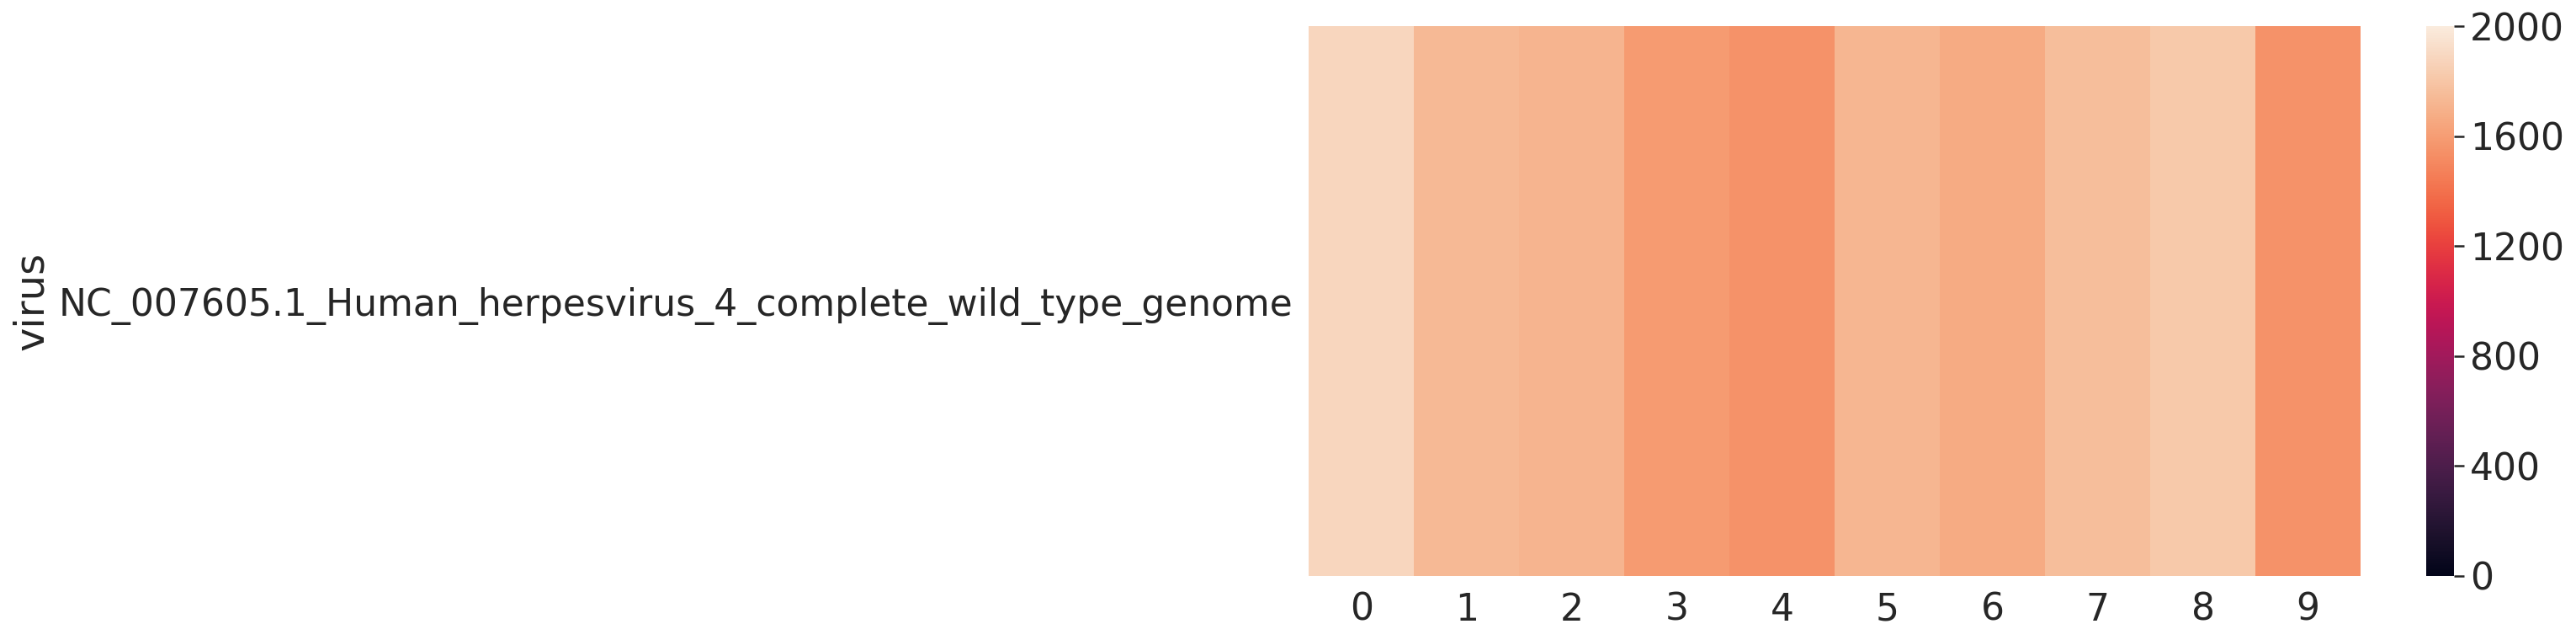

In [14]:
plt.figure(figsize=(14,6))
sns.heatmap(df_virtus, vmin=0, vmax=2000, annot=False)
sns.set(font_scale=2) 
plt.yticks(rotation=0)
plt.savefig('VIRTUS_heatmap.pdf', bbox_inches='tight')

## kraken2

In [15]:
for i,s in enumerate(list_samples):
    d = pd.read_csv('subsample_{}/kraken2_report'.format(s), sep='\t', header=None)
    d.columns = ['percent', '-', s, 'code', 'ID', 'virus']
    d = d.loc[d['code'] == 'S', ['virus', s]]
    d = d[d[s] > 400]

    if i==0:
        df_kraken2 = d.copy()
    else:
        df_kraken2 = pd.merge(df_kraken2, d, how="outer")
df_kraken2 = df_kraken2.fillna(0)

df_kraken2.index = df_kraken2.virus
# df_virtect = df_virtect.drop('virus')
df_kraken2 = df_kraken2.drop(columns=['virus'])
df_kraken2 = df_kraken2.sort_values(by='0', ascending=False)
df_kraken2.head()

,0,1,2,3,4,5,6,7,8,9
virus,,,,,,,,,,
Choristoneura fumiferana granulovirus,25148,25158,24751,25072,25117,24981,24828,25017,24718.0,24780
Shamonda orthobunyavirus,9819,9968,9815,9826,9804,9731,9772,9827,9842.0,9665
BeAn 58058 virus,3329,3293,3198,3199,3297,3202,3240,3166,3175.0,3216
Proteus phage VB_PmiS-Isfahan,1290,1318,1308,1266,1286,1308,1287,1322,1271.0,1301
Human gammaherpesvirus 4,934,935,911,937,924,933,914,927,907.0,925


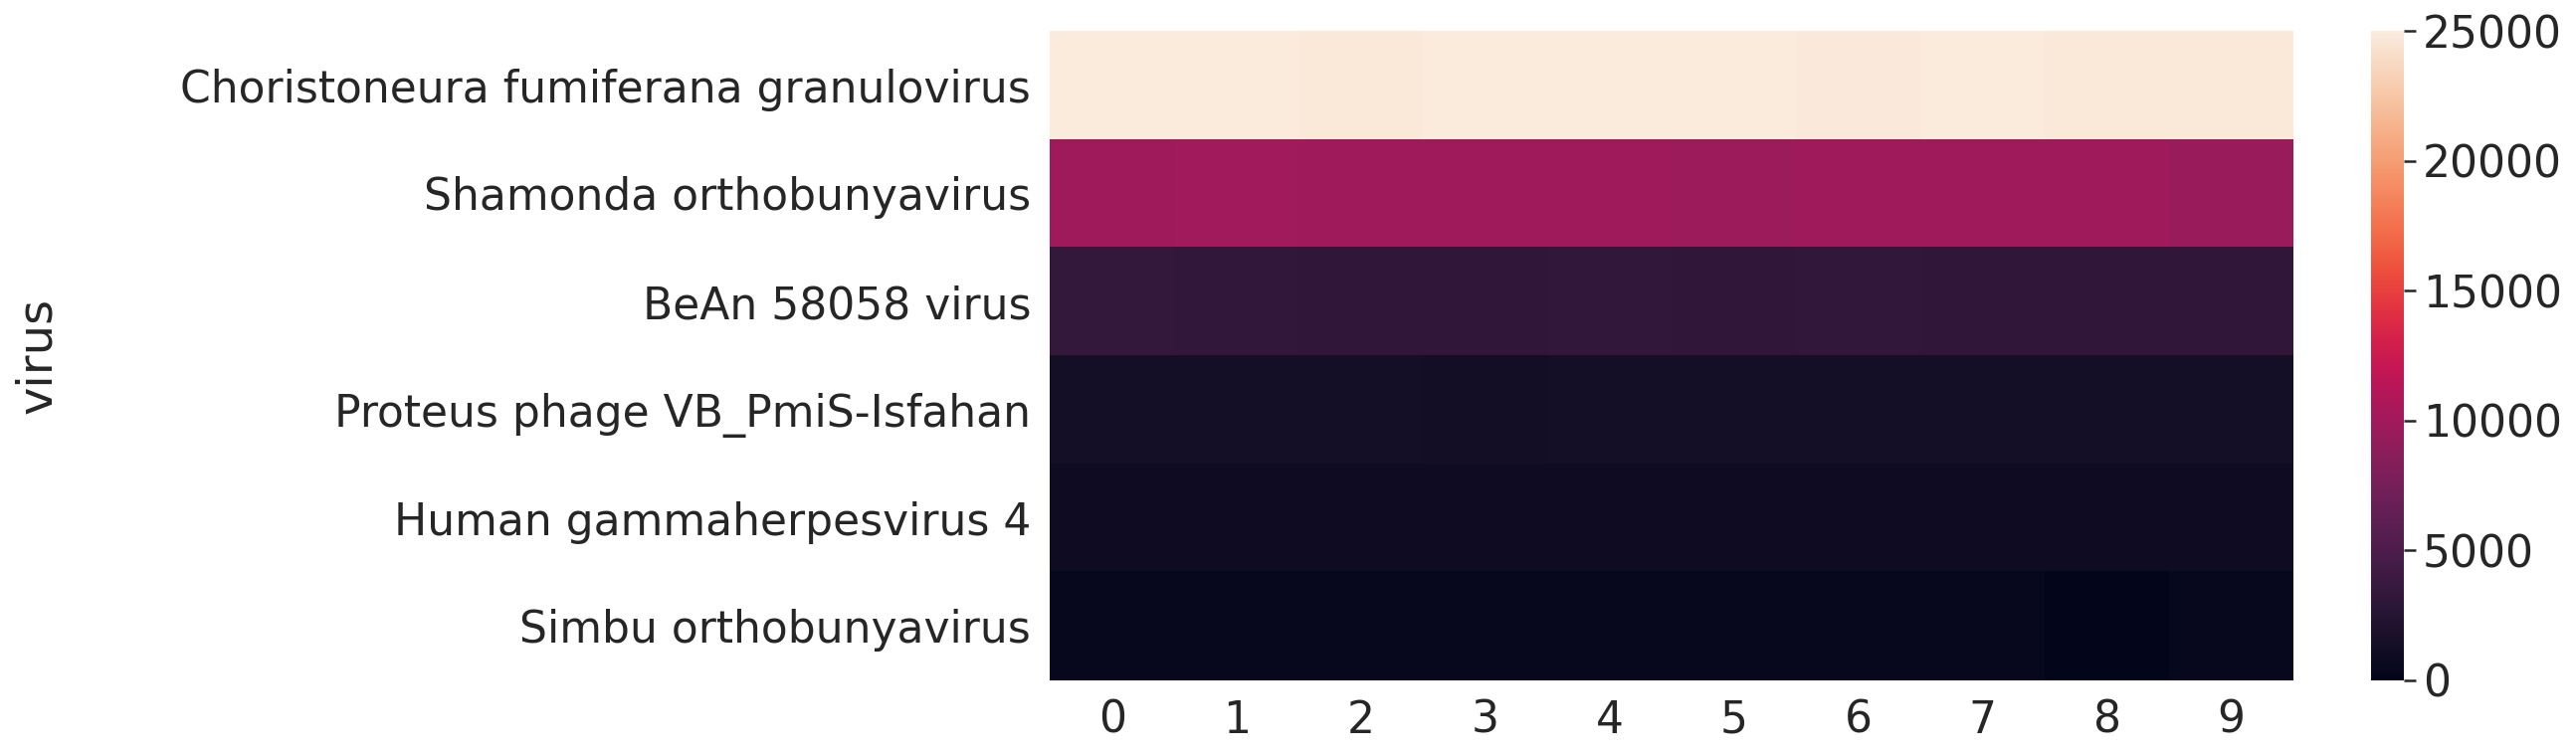

In [16]:
plt.figure(figsize=(14,6))
sns.heatmap(df_kraken2, vmin=0, vmax=25000, annot=False)
sns.set(font_scale=2) 
plt.savefig('kraken2_heatmap.pdf', bbox_inches='tight')

## Virtect

In [31]:
s = '0'

In [32]:
pd.read_csv('subsample_{}/VirTect/unmapped_viruses_count.txt'.format(s), 
            delim_whitespace=True, skiprows=1, header=None)

,0,1
0,846,"NC_001798.1_Human_herpesvirus_2,_complete_genome"
1,860,NC_007605.1_Human_herpesvirus_4_complete_wild_...
2,526,"NC_009334.1_Human_herpesvirus_4,_complete_genome"
3,2347,"NC_018464.1_Shamonda_virus_N_and_NSs_genes,_se..."


In [17]:
for i,s in enumerate(list_samples):
    d = pd.read_csv('subsample_{}/VirTect/unmapped_viruses_count.txt'.format(s), 
            delim_whitespace=True, skiprows=1, header=None)
    d.columns = [s, 'virus']
    d = d[['virus', s]]
    
    if i == 0:
        df_virtect = d.copy()
    else:
        df_virtect = pd.merge(df_virtect, d, how="outer")
        
df_virtect = df_virtect.fillna(0)

df_virtect.index = df_virtect.virus
# df_virtect = df_virtect.drop('virus')
df_virtect = df_virtect.drop(columns=['virus'])
df_virtect = df_virtect.sort_values(by='0', ascending=False)
df_virtect.index = df_virtect.index.str.split(',').str.get(0)
df_virtect.head()

,0,1,2,3,4,5,6,7,8,9
virus,,,,,,,,,,
NC_018464.1_Shamonda_virus_N_and_NSs_genes,2347,2399,2438,2420,2400,2372,2357,2326,2431,2285
NC_007605.1_Human_herpesvirus_4_complete_wild_type_genome,860,860,818,863,798,854,824,806,806,854
NC_001798.1_Human_herpesvirus_2,846,740,774,742,798,808,796,820,768,836
NC_009334.1_Human_herpesvirus_4,526,525,592,530,570,536,533,570,601,576


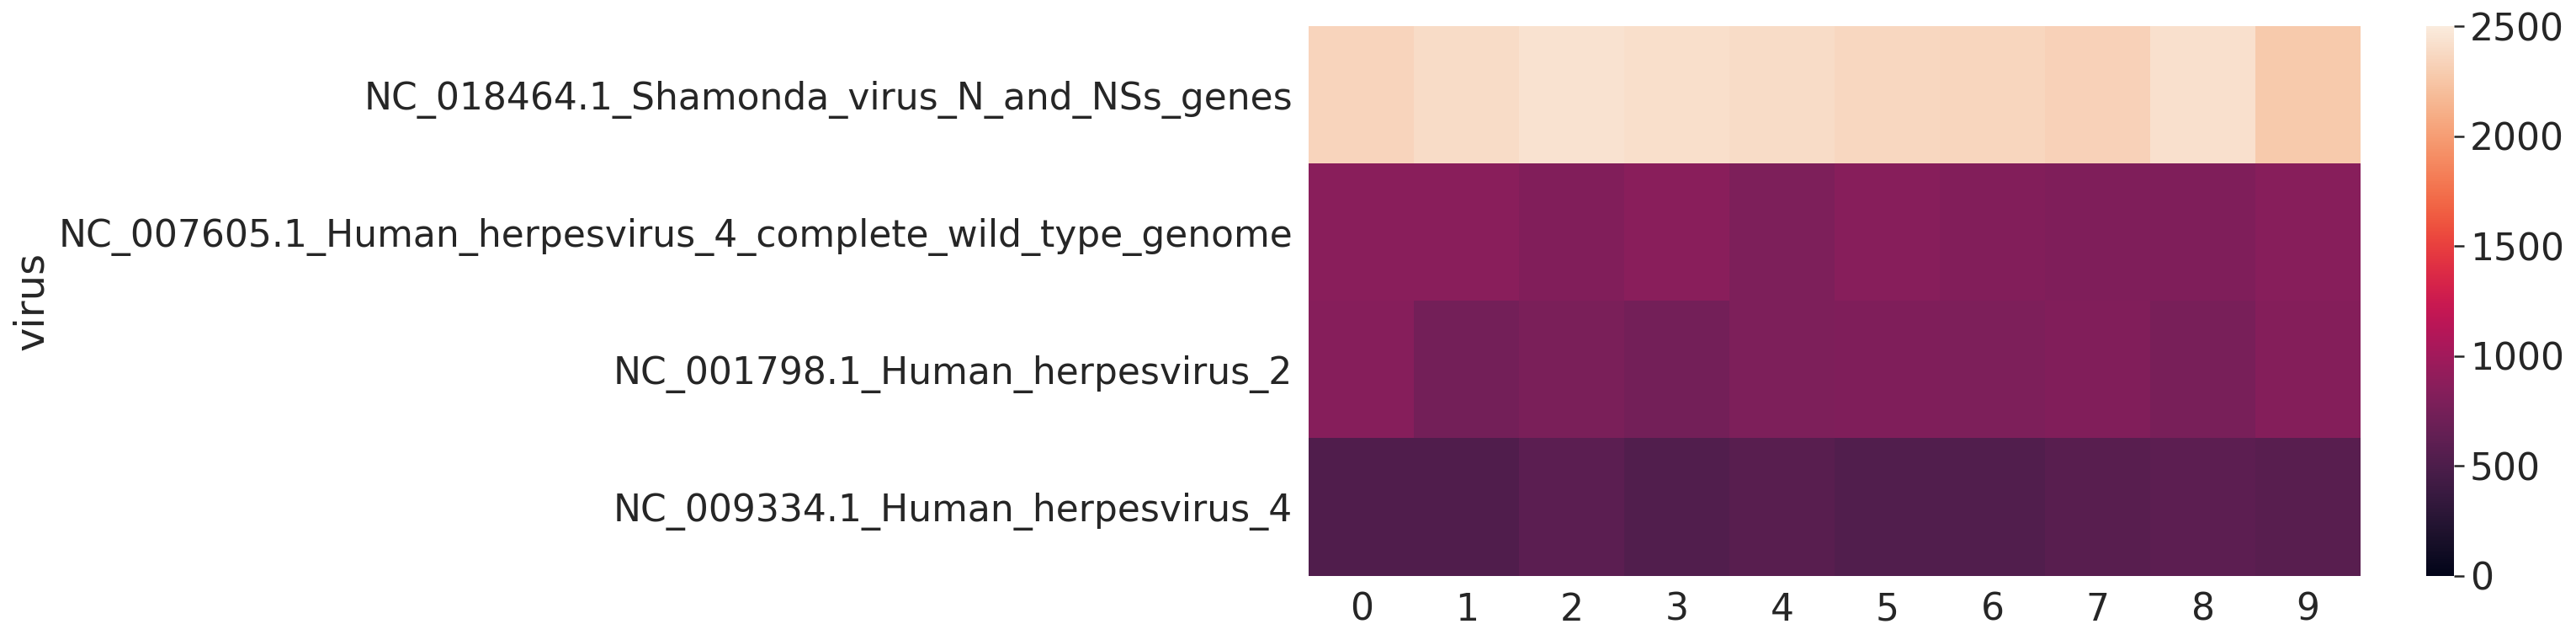

In [19]:
plt.figure(figsize=(14,6))
sns.heatmap(df_virtect, vmin=0, vmax=2500, annot=False)
plt.yticks(rotation=0)
sns.set(font_scale=2) 
plt.savefig('VirTect_heatmap.pdf', bbox_inches='tight')